In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Dataset:  listings.csv

Source: Inside Airbnb

Description: Detailed Listings data for New Orleans (as of March 2019)

Key Variables/Columns

o price: 15 - 8000         
o review_scores_rating: 20-100 (dropping nan/blank)        

In [23]:
# Read the csv file into a pandas DataFrame
lst = pd.read_csv('../Resources/listings.csv')
lst = lst[['price', 'review_scores_rating']]
lst = lst.dropna(axis=0, how="any")
lst.head()

,price,review_scores_rating
0,$300.00,97.0
1,$100.00,98.0
2,$125.00,99.0
3,$115.00,98.0
4,$50.00,95.0


In [24]:
import locale
import pandas as pd
locale.setlocale(locale.LC_ALL,'')
lst['price']=lst.price.map(lambda x: locale.atof(x.strip('$')))
lst.head()

,price,review_scores_rating
0,300.0,97.0
1,100.0,98.0
2,125.0,99.0
3,115.0,98.0
4,50.0,95.0


In [25]:
lst.reset_index(drop=True)
lst.count()

price                   5984
review_scores_rating    5984
dtype: int64

In [26]:
# lst.describe()
# 50% = 135; 75% = 206
lst50 = lst.loc[lst["price"] < 135, :]
lst50.head()

,price,review_scores_rating
1,100.0,98.0
2,125.0,99.0
3,115.0,98.0
4,50.0,95.0
5,123.0,98.0


In [28]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = lst.review_scores_rating.values.reshape(-1, 1)
y = lst.price.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (5984, 1) (5984, 1)


array([[ 97.],
       [ 98.],
       [ 99.],
       ...,
       [100.],
       [ 80.],
       [ 80.]])

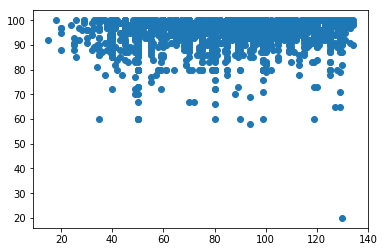

In [68]:
# Plot the data

plt.scatter(X, y)

In [69]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [70]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
# Print the coefficient and the intercept for the model

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[0.03216208]]
y-axis intercept:  [92.63267648]


In [72]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[15.]]
Max X Value: [[134.]]


In [73]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)

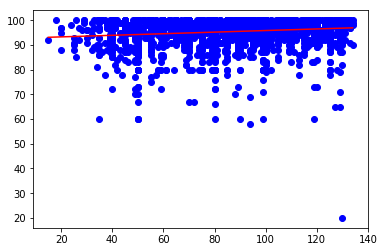

In [74]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.savefig('lr_price_v_score_under50pct2.png')
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 37.43916468465706
R-squared (R2): 0.0028891752208768384


Recall:
 - A "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.
 - R^2 (coefficient of determination) regression score function.
     - Best possible score is 1.0 and it can be negative 
     - A constant model that always predicts the expected value of y, disregarding the input features, would get R^2 score 0.0.

In [14]:
# Overall Score for the model
model.score(X, y)

0.0028891752208768384

## Dataset:  listings.csv

Key Variables/Columns

x accommodates: 1-16        
o square_feet: 0-3600 (drop nan/blank)         
o bathrooms: 0.5-14.5 (drop nan/blanks; drop/correct 54.5)        
o bedrooms: 0-10 (drop nan/blanks)           

In [30]:
mlr = pd.read_csv('../Resources/listings.csv')
mlr = mlr[['square_feet', 'bathrooms', 'bedrooms']]
mlr = mlr.dropna(axis=0, how="any")
mlr.head()

,square_feet,bathrooms,bedrooms
1,750.0,1.0,1.0
5,374.0,1.0,1.0
10,1800.0,1.0,1.0
11,450.0,1.0,2.0
12,500.0,2.0,1.0


In [23]:
mlr.count()

square_feet    63
bathrooms      63
bedrooms       63
dtype: int64

In [31]:
X = mlr[["bathrooms", "bedrooms"]]
y = mlr["square_feet"].values.reshape(-1, 1)
print(X.shape, y.shape)

(63, 2) (63, 1)


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.14537267198286297
Testing Score: 0.3512755424177567


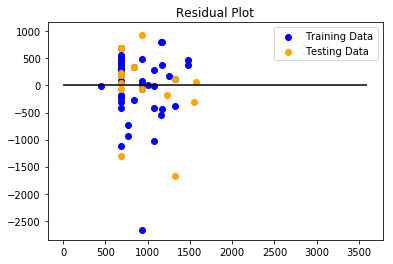

In [30]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.savefig('mlr_bbsq.png')
plt.show()

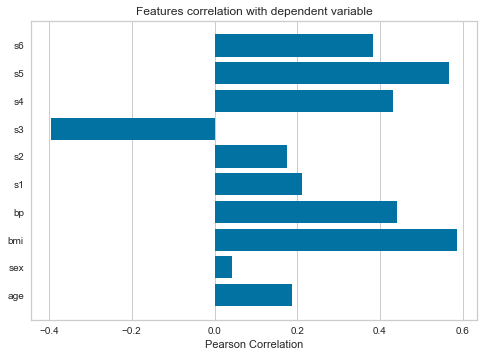

In [33]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation

# Load the regression data set
data = datasets.load_diabetes()
X, y = data['data'], data['target']
feature_names = np.array(data['feature_names'])

visualizer = FeatureCorrelation(labels=feature_names)
# visualizer = FeatureCorrelation()
visualizer.fit(X, y)
visualizer.poof()

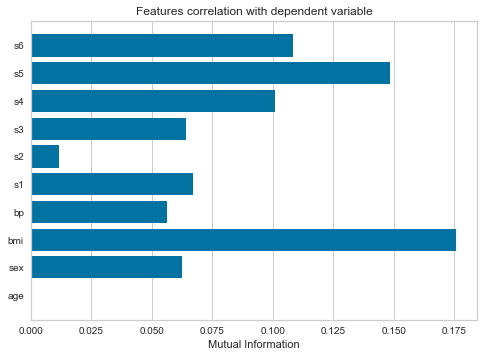

In [4]:
from sklearn import datasets
from yellowbrick.target import FeatureCorrelation

# Load the regression data set
data = datasets.load_diabetes()
X, y = data['data'], data['target']
feature_names = np.array(data['feature_names'])

discrete_features = [False for _ in range(len(feature_names))]
discrete_features[1] = True

visualizer = FeatureCorrelation(method='mutual_info-regression',
                                labels=feature_names)
visualizer.fit(X, y, discrete_features=discrete_features, random_state=0)
visualizer.poof()

Sources:   
PermutationImportance: https://www.kaggle.com/dansbecker/permutation-importance
GradientBoostingRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
import eli5
from eli5.sklearn import PermutationImportance

ModuleNotFoundError: No module named 'eli5'

In [41]:
lst = pd.read_csv('../Resources/listings.csv.gz')
# lst = lst[['price', 'review_scores_rating']]
# lst = lst.dropna(axis=0, how="any")
lst.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10291,https://www.airbnb.com/rooms/10291,20190306190816,2019-03-06,Spacious Cottage in Mid-City!,NaN,"Spacious house located in Mid-City, New Orlean...","Spacious house located in Mid-City, New Orlean...",none,NaN,...,f,f,moderate,t,f,1,1,0,0,0.99
1,19091,https://www.airbnb.com/rooms/19091,20190306190816,2019-03-06,Fully Furnished Cozy Apartment,CITY OF NEW ORLEANS STR LICENSE PERMIT NUMBER:...,SEE SPECIAL REDUCED SUMMER PRICING! This apa...,CITY OF NEW ORLEANS STR LICENSE PERMIT NUMBER:...,none,"NorthWest Carrollton, where this apartment is ...",...,t,f,strict_14_with_grace_period,f,f,1,1,0,0,3.99
2,26834,https://www.airbnb.com/rooms/26834,20190306190816,2019-03-06,Maison Mandeville in the Marigny,NaN,Charming shotgun apartment in the Marigny neig...,Charming shotgun apartment in the Marigny neig...,none,NaN,...,f,f,strict_14_with_grace_period,f,t,2,2,0,0,2.10
3,53173,https://www.airbnb.com/rooms/53173,20190306190816,2019-03-06,MARDI GRAS YA’LL HUNDREDS 5 STAR REVIEWS !!!,Current articles in NYTimes and travel magazi...,This is a VERY large bedroom - boasting queen ...,Current articles in NYTimes and travel magazi...,none,"Funky creative types (sorta like Williamsburg,...",...,t,f,strict_14_with_grace_period,f,f,2,1,1,0,1.32
4,53544,https://www.airbnb.com/rooms/53544,20190306190816,2019-03-06,Historical Bywater Mother in Law Cottage,We are little slice of authentic NOLA living.....,We offering up a New Orleans experience. Our...,We are little slice of authentic NOLA living.....,none,Kentucky st not a very well known street in Ne...,...,f,f,strict_14_with_grace_period,f,f,2,1,1,0,1.76


In [18]:

data = all_listings.dropna(axis=0, how='any')
data.shape

y = data['price']
X = data.drop(['price', 'lat_center', 'lon_center', 'longitude', 'latitude', 'city_index'], axis=1) 
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42)

%%time 
regr = GradientBoostingRegressor(n_estimators=75, learning_rate=0.31, max_depth=4, subsample=1.0,
                                 random_state=42)
regr.fit(X_train, y_train)
print(r2_score(y_val, regr.predict(X_val)))

perm = PermutationImportance(regr, random_state=42).fit(X_val, y_val)
eli5.show_weights(perm, top=X.shape[1], feature_names = X.columns.tolist())

NameError: name 'load_concrete' is not defined